# Histograms

Um histograma é um gráfico de barras que mostra a frequência de um determinado fenômeno.

Um grande exemplo é distribuição de probabilidades.

Funções de probabilidade podem ser visualizadas como uma curva, onde o eixo y diz a probabilidade de um certo valor (eixo x) ocorrer. Isso é chamado de função de densidade de probabilidade. Os valores de y são limitados de 0 a 1.

Então um histograma é apenas um gráfico de barras onde os valores de x são algum dado observável e y a probabilidade de ocorrer



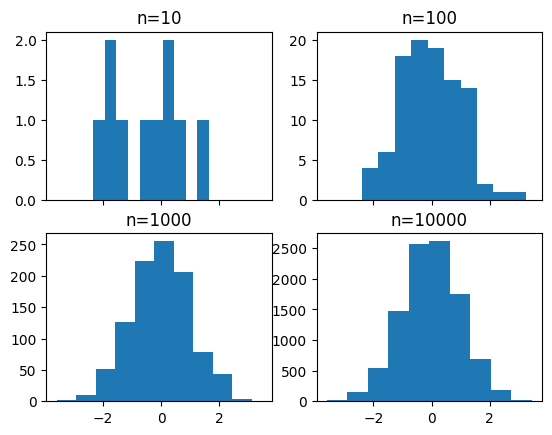

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Vamos criar algumas amostras de distribuição normal e plotar 4 diferentes histogramas
# Primeiro vamos criar uma grade 2 x 2.
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]


# Agora vamos plotar

for n in range(0,len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title(f'n={sample_size}')
    

Podemos ver que o plot de 10000 amostras é muito mais suave do que o plot de 10 amostras.
Isso nos traz uma questão importante sobre quantos `bins` devemos plotar.

## GridSpec
GridSpec nos permite mapear eixos em várias células em uma grade.

Exemplo, vamos criar um scatterplot onde o eixo y vem da distribuição normal e o eixo x vem de uma distribuição aleatória

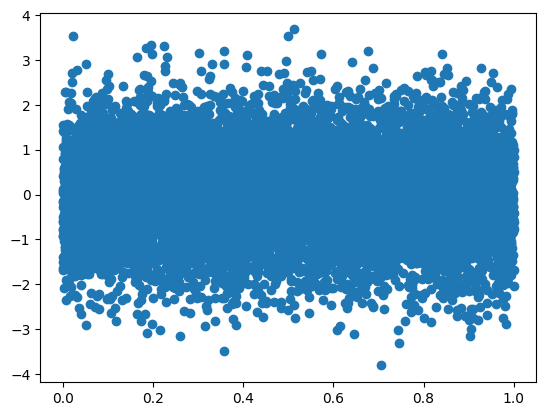

In [15]:
y=np.random.normal(size=10000)
x=np.random.random(size=10000)
plt.scatter(x,y)

Não está totalmente claro, a partir desse plot, qual distribuição é cada eixo, mas podemos adicionar dois plots menores, cada um sendo um histograma, para deixar isso mais claro.

Vamos definir uma grade 3x3.
Queremos que o primeiro histograma pegue o espaço em cima e da direita, e o segundo histograma pegue dois espaços da esquerda embaixo.
E o scattarplot ficará embaixo na direita.

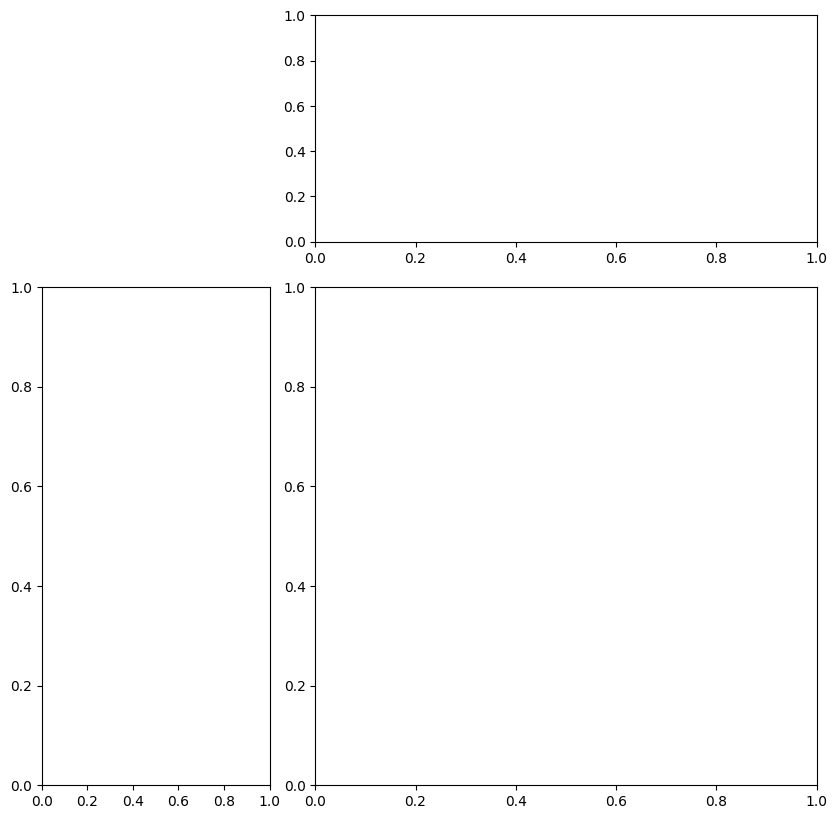

In [32]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)


# O GridSpec é indexado com linhas e colunas (começando do zero).
# Então vamos criar o primeiro subplote histograma na linha 0 cobrindo a coluna do meio até a direita.
top_histogram=plt.subplot(gspec[0,1:])

# O histograma do lado começará no meio da linha 1 e irá até embaixo.
side_histogram=plt.subplot(gspec[1:,0])

# Finalmente, o scatterplot assumirá a posição baixo direita, tomando 4 espaços.
lower_right=plt.subplot(gspec[1:,1:])

Agora vamos preencher alguns dados.


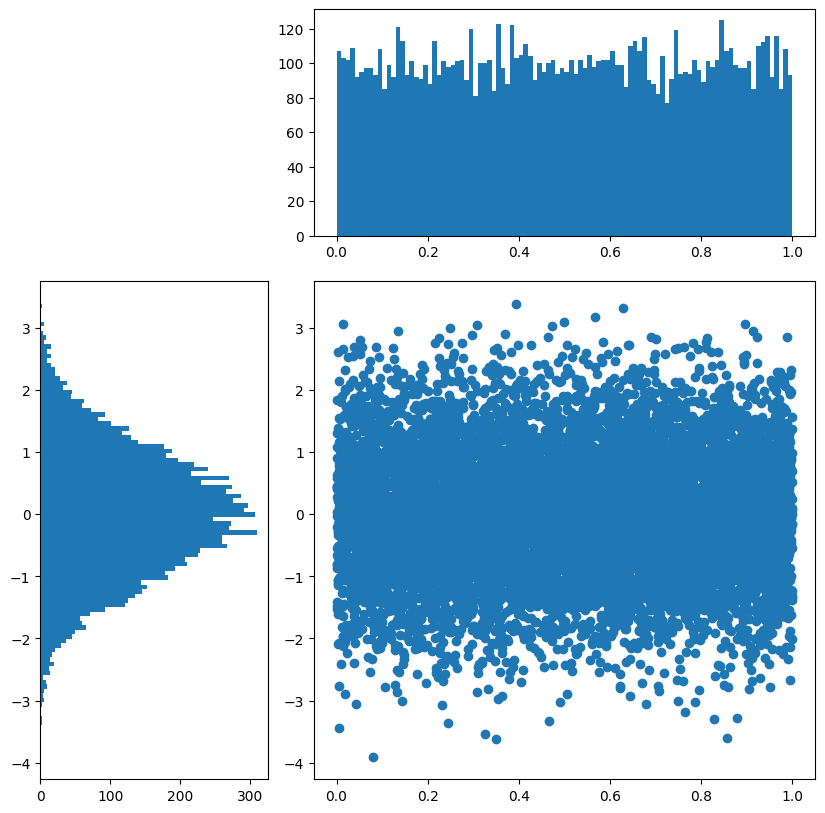

In [46]:
y=np.random.normal(size=10000)
x=np.random.random(size=10000)

plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Random distribution histogram
top_histogram=plt.subplot(gspec[0,1:])
top_histogram.hist(x,bins=100)

# Normal distribution histogram
side_histogram=plt.subplot(gspec[1:,0])
side_histogram.hist(y,bins=100,orientation='horizontal')

# Scatter Plot
lower_right=plt.subplot(gspec[1:,1:])
lower_right.scatter(x,y)

Não ligamos para o eixo y do histograma de cima, nem para o eixo x do histograma de baixo. Como são histogramas de densidadede probabilidades, só nos importamos com os valores relativos, e podemos indicar isso passando o parâmetro `density=True`.

Podemos, também, inverter o eixo x do histograma de baixo utilizando `invert_xaxis`.

In [67]:
mu, sigma = 0, 0.1 # mean and standard deviation

array([-1.25173282e-01,  1.47356217e-01, -7.88607448e-02, -1.89432526e-01,
       -7.74947771e-02,  1.91282940e-01,  2.49991221e-02,  1.19461483e-01,
        2.44780242e-02, -3.05429384e-02, -1.77362352e-01, -1.09026479e-01,
       -2.93416825e-01,  1.17873597e-01, -3.07417284e-01, -2.06321179e-01,
        1.31760541e-02,  2.95009192e-02, -2.11775354e-01, -8.99976142e-02,
        5.21084143e-02, -5.29757406e-02, -9.21571606e-02,  2.35995316e-02,
       -1.15141727e-02, -8.84290221e-02, -9.13801522e-02,  9.73328965e-02,
       -7.85199186e-02, -5.69781611e-02, -9.76859827e-02,  8.52570869e-02,
       -8.83870428e-02,  1.23444631e-01, -3.13546188e-03,  5.22687545e-02,
       -5.61000119e-02,  2.72990857e-02,  1.22859467e-01, -8.53751136e-02,
       -3.79323758e-02,  1.44850525e-01,  1.13017620e-02,  6.81345000e-03,
        5.35530585e-02, -1.35835212e-01, -2.18796856e-02,  5.30891777e-03,
       -1.76062844e-01, -1.28963018e-01,  3.28184709e-02, -1.04812177e-01,
        5.56991429e-02, -

<bound method _AxesBase.set_ylim of <AxesSubplot: >>

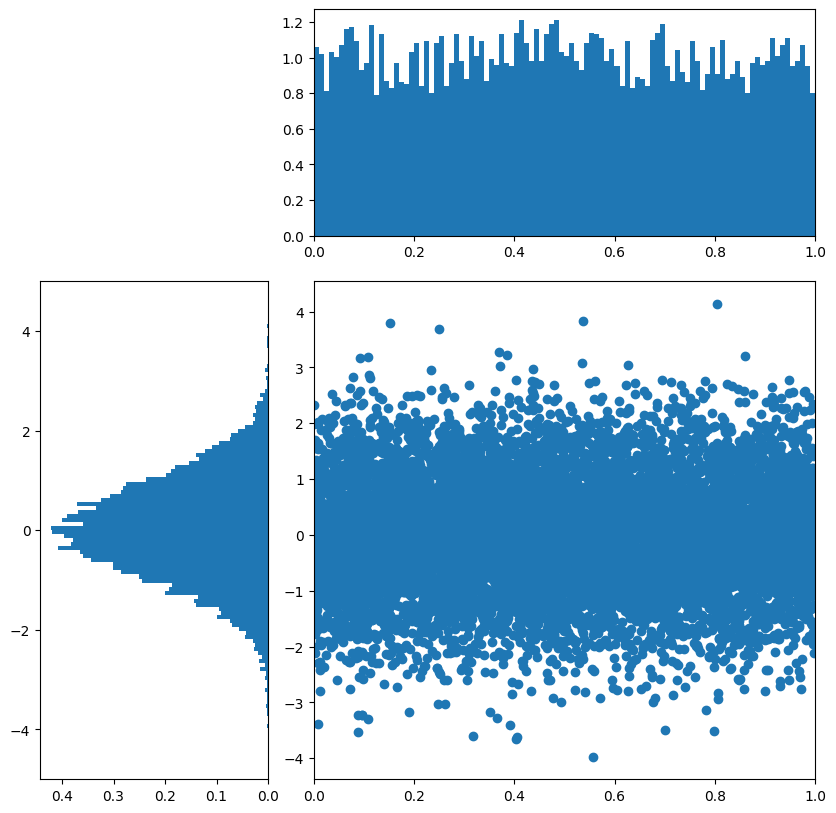

In [100]:
y=np.random.normal(size=10000)
x=np.random.random(size=10000)

plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Random distribution histogram
top_histogram=plt.subplot(gspec[0,1:])
top_histogram.hist(x,bins=100,density=True)

# Normal distribution histogram
side_histogram=plt.subplot(gspec[1:,0])
side_histogram.hist(y,bins=100,orientation='horizontal',density=True)
side_histogram.invert_xaxis()

# Scatter Plot
lower_right=plt.subplot(gspec[1:,1:])
lower_right.scatter(x,y)

# Padding desnecessário
top_histogram.set_xlim(0,1)
lower_right.set_xlim(0,1)

side_histogram.set_ylim(-5,5)
lower_right.set_ylim